# Predicting Heart Disease using Machine Learning

This notebook will introduce some foundation machine learning and data science concepts by exploring the problem of heart disease classification.

For example, given a person's health characteristics, we're going to build a model to predict whether or not they have heart disease.

## What is classification?
Classification involves deciding whether a sample is part of one class or another (binary classification).

If there are multiple class options, it's referred to as multi-class classification.



## 1. Going through the 6 step ML framework

### 1.1 Problem Definition

In our case, the problem we will be exploring is **binary classification** (a sample can only be one of two things). 

This is because we're going to be using a number of differnet **features** (pieces of information such as health characteristics) about a person to predict whether they have heart disease or not.

In a statement,

*Given clinical parameters about a patient, can we predict whether or not they have heart disease?*

### 1.2 What data are we using?

The original data came from the [Cleveland database](https://archive.ics.uci.edu/dataset/45/heart+disease) from UCI Machine Learning Repository.

downloaded it in a formatted way from [Kaggle](https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset).

The original database contains 76 attributes, but here only 14 attributes will be used. **Attributes** (also called **features**) are the variables what we'll use to predict our **target variable**.

Attributes and features are also referred to as **independent variables** and a target variable can be referred to as a **dependent variable**.

> **Note:** We use the independent variable(s)to predict our dependent variable(s).

In our case, the independent variables are a patient's different medical attributes and the dependent variable is whether or not they have heart disease.

### 1.3 Which features of the data will be important to us?

#### Heart Disease Data Dictionary
The following are the features we'll use to predict our target variable (heart disease or no heart disease).

| Feature  | Description | Example Values |
|:-----|:-----|:------|
| **age** | Age in years | 29, 45, 60 |
| **sex** | 1 = male; 0 = female | 0, 1  |
| **cp**  | Chest pain type | 0: Typical angina (chest pain), 1: Atypical angina (chest pain not related to heart), 2: Non-anginal pain (typically esophageal spasms (non heart related), 3: Asymptomatic (chest pain not showing signs of disease) |
| **trestbps** | Resting blood pressure (in mm Hg on admission to the hospital)  | 120, 140, 150 |
| **chol** | Serum cholesterol in mg/dl | 180, 220, 250 |
| **fbs** | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) | 0, 1 |
| **restecg** | Resting electrocardiographic results | 0: Nothing to note, 1: ST-T Wave abnormality, 2: Left ventricular hypertrophy  |
| **thalach** | Maximum heart rate achieved | 160, 180, 190 |
| **exang**  | Exercise induced angina (1 = yes; 0 = no) | 0, 1 |
| **oldpeak**  | ST depression (heart potentially not getting enough oxygen) induced by exercise relative to rest | 0.5, 1.0, 2.0  |
| **slope** | The slope of the peak exercise ST segment | 0: Upsloping, 1: Flatsloping, 2: Downsloping |
| **ca** | Number of major vessels (0-3) colored by fluoroscopy | 0, 1, 2, 3 |
| **thal** | Thalium stress result  | 1: Normal, 3: Normal, 6: Fixed defect, 7: Reversible defect |
| **target** | Have disease or not (1 = yes; 0 = no) | 0, 1 |

> **Note:** No personal identifiable information (PPI) can be found in the dataset.

## 2. Preparing the tools

In [1]:
# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Models
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

# Print last updated
import datetime
print(f"Notebook last updated: {datetime.datetime.now()}\n")

# Print versions of libraries we're using (as long as yours are equal or greater than these, your code should work)
print(f"NumPy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"Scikit-Learn version: {sklearn.__version__}")

Notebook last updated: 2024-10-17 20:25:13.434577

NumPy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.8.4
Scikit-Learn version: 1.5.1


## 3. Loading Data

In [2]:
df=pd.read_csv("data/heart-disease.csv")
df.shape

(303, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 4. Data Exploration

In [9]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

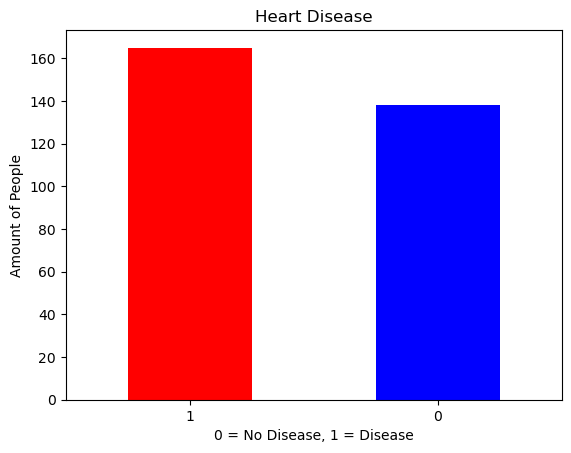

In [58]:
df["target"].value_counts().plot(kind="bar",color=["red","blue"])
plt.title("Heart Disease")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount of People")
plt.xticks(rotation=0);

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [17]:
#checking missing data
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 4.1 Comparing one feature to another

#### Comparing Heart Disease and Gender

In [22]:
#heart disease frequency according to sex(1=male,0=female)
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [23]:
#comparing target with sex colum
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


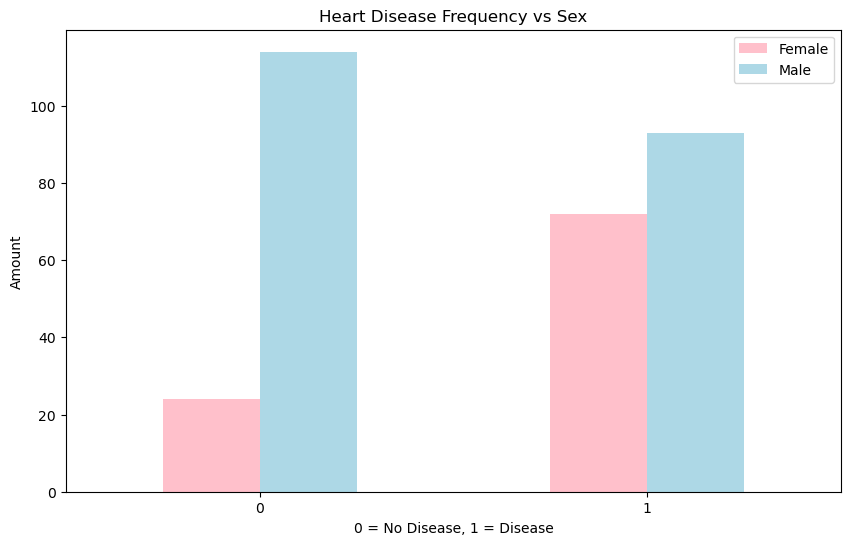

In [28]:
#plotting 
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["pink","lightblue"])
plt.title("Heart Disease Frequency vs Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

#### Comparing Heart Disease and Age

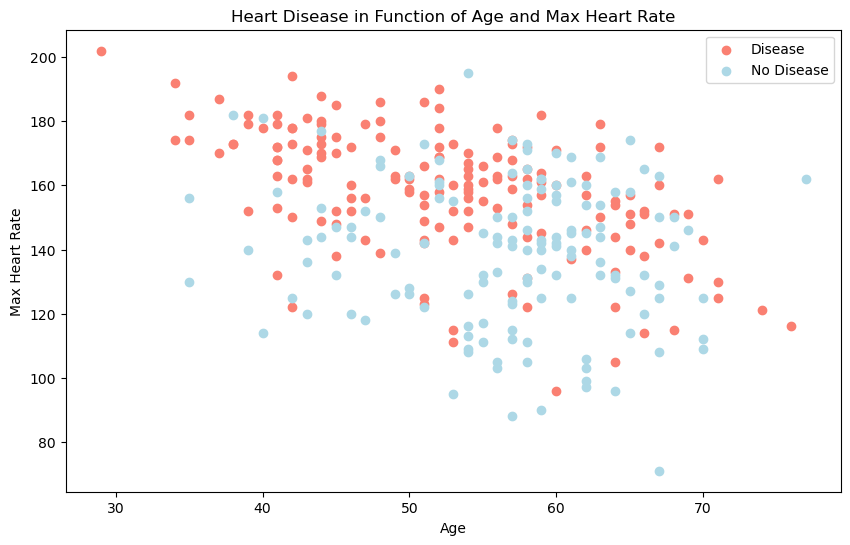

In [42]:
#comparing age and max heart rate(thalach)
plt.figure(figsize=(10,6))

#people with heart disease
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
           color="salmon")

#people with no heart disease
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
           color="lightblue")

plt.title("Heart Disease in Function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

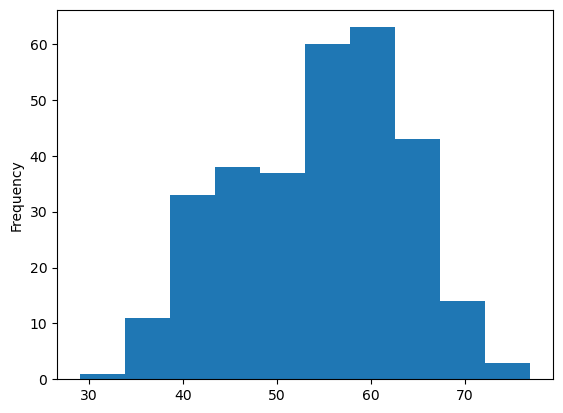

In [49]:
#Age distribution
df.age.plot.hist();

#### Heart Disease Frequency per Chest Pain Type


In [50]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


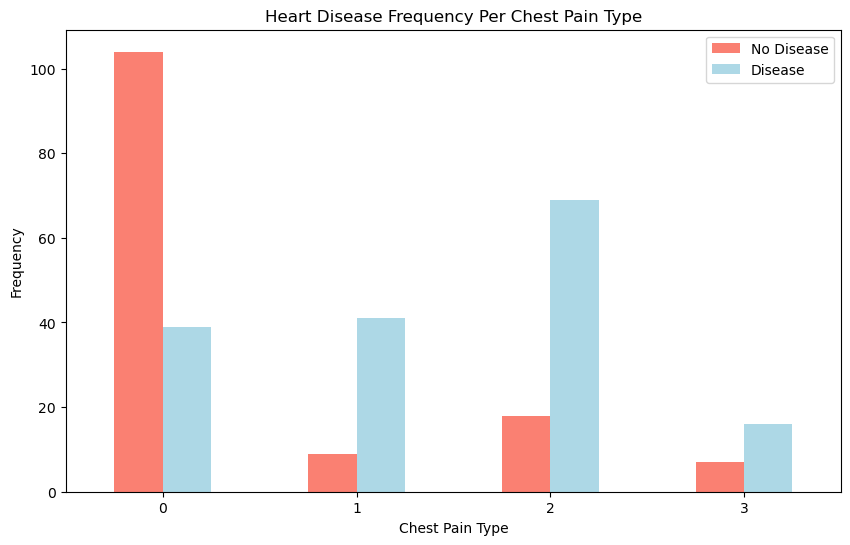

In [53]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

In [54]:
#coreealation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


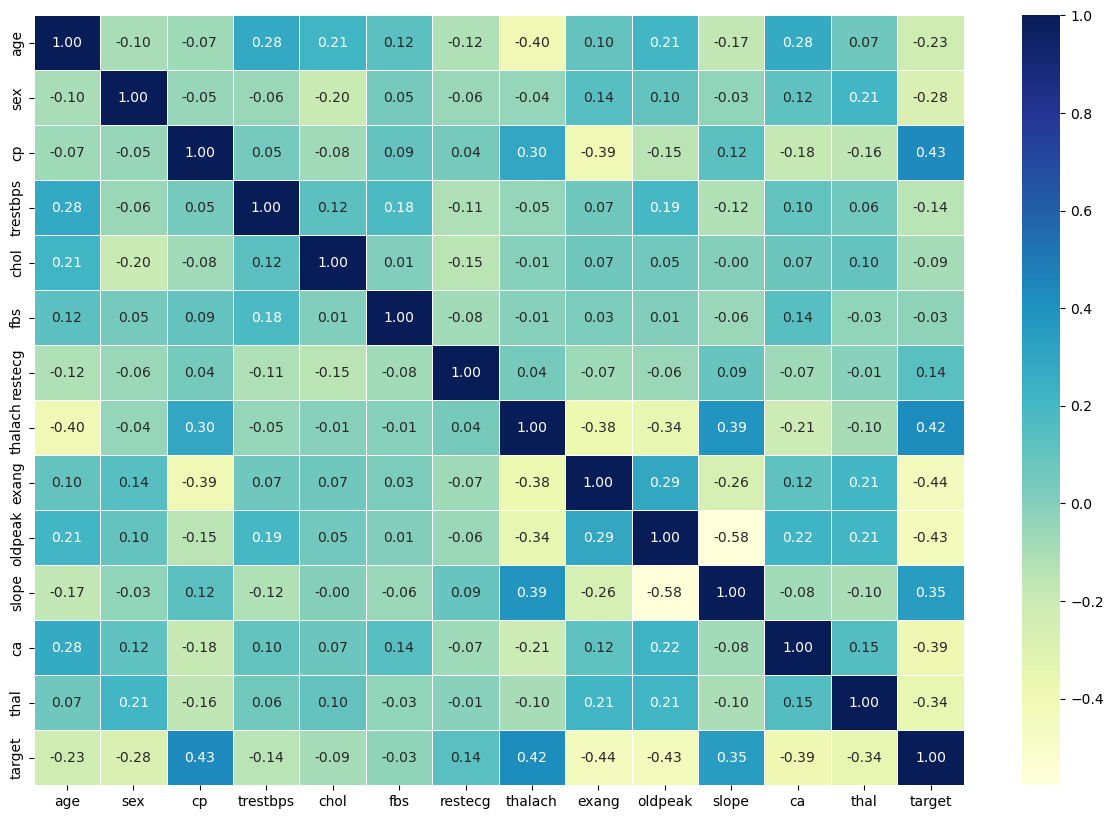

In [55]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")

# 5. Modeling
We've explored the data, now we'll try to build a machine learning model to be able to predict our target variable based on the 13 independent variables.

We're trying to predict our target variable using all of the other variables.
To do this, we'll split the target variable from the rest.

* x - Our features (all variables except the target column)
* y - Our target variable.


In [4]:
#splitting data

x=df.drop("target",axis=1)
y=df["target"]

In [5]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [6]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### 5.1 Creating a training and test split
* **Training set (often 70-80% of total data)**
* **Testing set (often 20-30% of total data)**

In [7]:
#splitting data into training data and testing data
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [8]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [9]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

### 5.2 Choosing a model
1. Logistic Regression
2. K-Nearest Neighbors
3. RandomForest

In [10]:
#Putting models in a dictionary
models={"Logistic Regression":LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "Random Forest":RandomForestClassifier()}
#fitting and scoring models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    #for storing scores
    model_scores={} 
    #looping through models
    for name,model in models.items():
        model.fit(x_train,y_train)
        #evaluating and storing its score
        model_scores[name]=model.score(x_test,y_test)
    return model_scores

In [11]:
model_scores=fit_and_score(models,x_train,x_test,y_train,y_test)
model_scores

C:\Users\Azhar\Desktop\ML_projects\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### 5.3 Comparing the results of several models

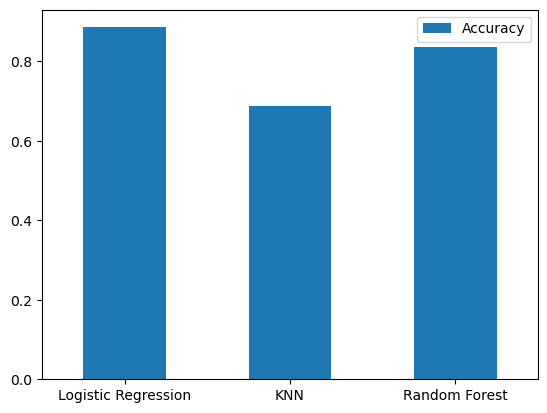

In [12]:
model_compare=pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.T.plot.bar()
plt.xticks(rotation = 0);

## 6. Hyperparameter tuning and cross-validation

### 6.1 Tune KNeighborsClassifier (K-Nearest Neighbors or KNN) by hand


In [14]:
train_scores=[]
test_scores=[]

#list of different values for n_neighbors
neighbors=range(1,21)

knn=KNeighborsClassifier()

#looping through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))
    

In [15]:
train_scores


[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [16]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


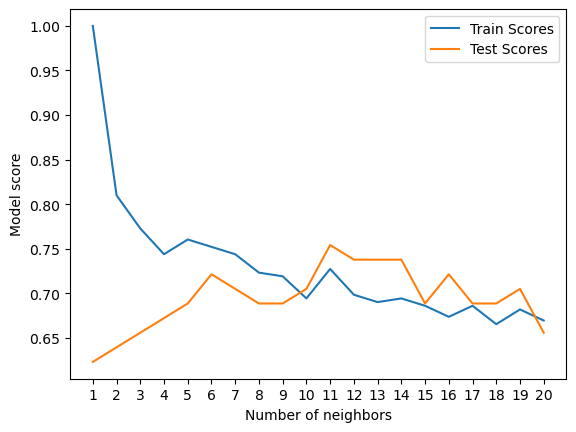

In [20]:
plt.plot(neighbors,train_scores,label="Train Scores")
plt.plot(neighbors,test_scores,label="Test Scores")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Looking at the graph, n_neighbors = 11 seems best.

Even knowing this, the KNN's model performance didn't get near what LogisticRegression or the RandomForestClassifier did.

Because of this, we'll discard KNN and focus on the other two.

We've tuned KNN by hand but let's see how we can LogisticsRegression and RandomForestClassifier using RandomizedSearchCV.

Instead of us having to manually try different hyperparameters by hand, RandomizedSearchCV tries a number of different combinations, evaluates them and saves the best.

### 6.2 Tuning models with with [`RandomizedSearchCV`]

In [39]:
#Hyperparameter grid for LogisticRegression
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}
#Hyperparameter grid for RandomForestClassifier
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}

In [29]:
#Tuning LogisticRegression
np.random.seed(42)

rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)

rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [30]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [31]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

In [35]:
#Tuning RandomForestClassifier
np.random.seed(42)

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                             param_distributions=rf_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)

rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [36]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [37]:
rs_rf.score(x_test,y_test)

0.8688524590163934

### 6.3 Tuning a model with [`GridSearchCV`]

In [41]:
#Hyperparameter grid for LogisticRegression
log_reg_grid={"C":np.logspace(-4,4,30),
             "solver":["liblinear"]}

gs_log_reg=GridSearchCV(LogisticRegression(),
                             param_grid=log_reg_grid,
                             cv=5,
                             verbose=True)
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [42]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [43]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

## 7. Evaluating a classification model, beyond accuracy

#### Metric/Evaluation Technique 

* ROC curve and AUC score 
* Confusion matrix 
* Classification report 
* Precision 
* Recall 
* F1-score 

In [45]:
#predictions with tuned model
y_preds=gs_log_reg.predict(x_test)

In [46]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

### 7.1 ROC Curve and AUC Scores
It's a way of understanding how your model is performing by comparing the true positive rate to the false positive rate.

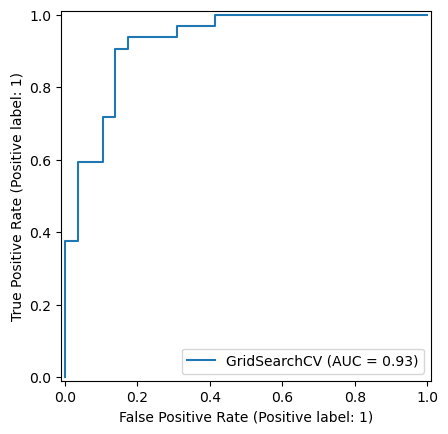

In [48]:
#ROC Curve
RocCurveDisplay.from_estimator(estimator=gs_log_reg,
                              X=x_test,
                              y=y_test);

### 7.2 Creating a confusion matrix 

A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).

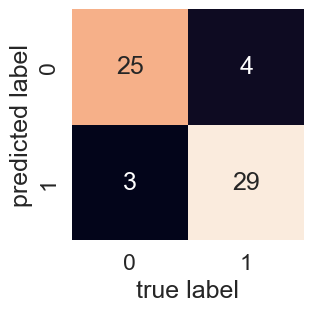

In [51]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                                   annot=True,
                                   cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")

plot_conf_mat(y_test,y_preds)

### 7.3 Classification report

A classification report is a collection of different metrics and other details.
A classification report will also give us information on the precision and recall of our model for each class.

In [52]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



| **Metric/metadata** | **Explanation** | 
| ----- | ----- | 
| **Precision** | Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0. |
| **Recall** | Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0. |
| **F1 score** | A combination of precision and recall. A perfect model achieves an F1 score of 1.0. |
| **Support** | The number of samples each metric was calculated on. |
| **Accuracy** | The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0. |
| **Macro avg** | Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric. |
| **Weighted avg** | Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples). |

##### Evaluation metrics using cross-validation

In [54]:
#checking best parameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [55]:
#new classifier with best parameters
clf=LogisticRegression(C=0.20433597178569418,
                      solver="liblinear")

In [57]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5, # 5-fold cross-validation, this is the default
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [58]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [59]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       x,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.8207936507936507

In [60]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    x,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.9212121212121213

In [61]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                x,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.8673007976269721

#### Visualizing cross-validated metrics

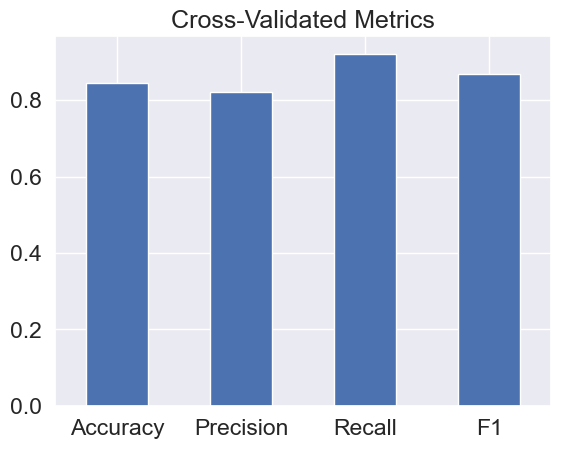

In [64]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False)
plt.xticks(rotation = 0);

## 8. Feature importance


In [67]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(x_train, y_train);

In [68]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.8604465 ,  0.66067044, -0.01156993, -0.00166374,
         0.04386111,  0.31275842,  0.02459361, -0.6041308 , -0.56862808,
         0.45051629, -0.63609895, -0.67663378]])

In [69]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.003167280425913024,
 'sex': -0.8604465017405314,
 'cp': 0.6606704375815468,
 'trestbps': -0.011569931400895204,
 'chol': -0.0016637445504085657,
 'fbs': 0.04386110683275644,
 'restecg': 0.3127584216723769,
 'thalach': 0.024593614040407018,
 'exang': -0.6041307979006147,
 'oldpeak': -0.5686280785492623,
 'slope': 0.45051628777983527,
 'ca': -0.6360989513753182,
 'thal': -0.6766337783287578}

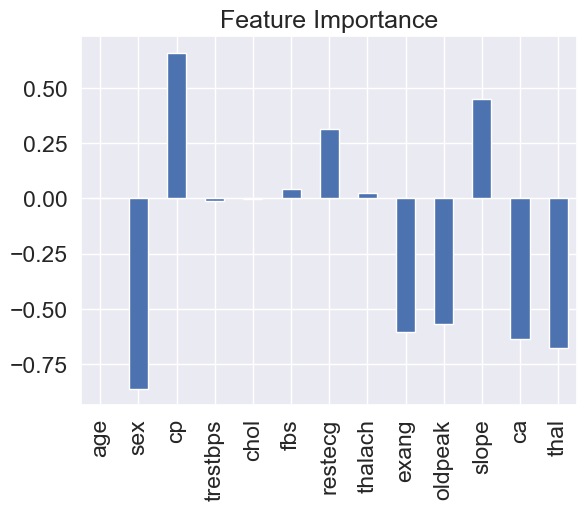

In [73]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);